*16 Sep 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 8
- Implement text summarization using LSTM and Attention.
- This exercise can be long. So use this resource: https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
- Implement the same with another dataset of your choice.
- Build three systems and monitor the change in performance with respect to change in:
  - maximum length of the text,
  - maximum length of the summary,
  - number of LSTM layers in the encoder.  
- Don't dwell much on the theory for now. Focus on the implementation, and get it right. We will eventually (in a few classes) cover the theory in the theory class. Come back to your notebook and reflect on it later.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/archive.zip .
!unzip archive.zip


Archive:  archive.zip
  inflating: cnn_dailymail/test.csv  
  inflating: cnn_dailymail/train.csv  
  inflating: cnn_dailymail/validation.csv  


# Importing Libs

In [ ]:
import pandas as pd
import numpy as np

# Importing Data

In [ ]:
train_df = pd.read_csv('/content/cnn_dailymail/train.csv')
test_df = pd.read_csv('/content/cnn_dailymail/test.csv')

In [ ]:
train_df

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


In [ ]:
test_df

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


Reduce data length

In [ ]:
from sklearn.utils import shuffle
train_df_shuffled = shuffle(train_df, random_state=42)  # random_state for reproducibility
subset_size = int(0.1 * len(train_df_shuffled)) # take 0.25 of data length عايزين نخلص
train_df = train_df_shuffled.iloc[:subset_size]
train_df

,id,article,highlights
272581,ed0fed726929c1eeabe6c390e47128dbb7d7a055,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...
772,023cd84001b33aed4ff0f3f5ecb0fdd2151cf543,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...
171868,6a70a0d8d3ed365fe1df6d35f1587a8b9b298618,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...
63167,b37204c13ea38b511265e41ac69fb12acfb63f85,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...
68522,c24e5805afd5145bc48410e876db91d44a06be5e,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...
...,...,...,...
225109,af82d43ecb0fb4ce0bb23e4fda724596181c6709,An ax wielding teen was left crying for his mo...,Store clerk Ali Ait Mahdi said he defended him...
73267,cfca4c7a8eff7f6c1230f0b2866504f1513c68c0,A food supplier falsely marketed beef to Musli...,"Midamar Corp, of Cedar Rapids, Iowa, sold food..."
9840,1be8e21ffcabec519f305f35643821670b485181,New York (CNN) -- Diplomacy hasn't worked. San...,Hafez Nazeri and his father Shahrem play hybri...
210557,9cb1380d06a63402cb38089b4a125184e831bbde,(CNN) -- Is Gail Kelly the most powerful woman...,"Meet Gail Kelly, CEO of Australia's second lar..."


In [ ]:
train_df.drop_duplicates(['highlights'], inplace=True)
test_df.drop_duplicates(['highlights'], inplace=True)
train_df = train_df.drop(['id'], axis= 1)
train_df.reset_index(inplace=True, drop=True)
test_df = test_df.drop(['id'], axis= 1)
test_df.reset_index(inplace=True, drop=True)

<ipython-input-8-b587cac84ca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop_duplicates(['highlights'], inplace=True)


In [ ]:
train_df

,article,highlights
0,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...
1,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...
2,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...
3,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...
4,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...
...,...,...
28647,An ax wielding teen was left crying for his mo...,Store clerk Ali Ait Mahdi said he defended him...
28648,A food supplier falsely marketed beef to Musli...,"Midamar Corp, of Cedar Rapids, Iowa, sold food..."
28649,New York (CNN) -- Diplomacy hasn't worked. San...,Hafez Nazeri and his father Shahrem play hybri...
28650,(CNN) -- Is Gail Kelly the most powerful woman...,"Meet Gail Kelly, CEO of Australia's second lar..."


In [ ]:
test_df

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...
11444,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11445,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11446,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11447,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


# Text Cleaning

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    #convert text to doc
    doc = nlp(text)

    # filter out stopwords and punctuation
    cleaned_words = [token.text.lower()
                     for token in doc
                     if not token.is_stop and not token.is_punct]

    return " ".join(cleaned_words)


### When I tried the data length to be about 57K and 124K and 248K I took a lot of time to clean so I taked first 10K article

In [ ]:
new_train_df = train_df[:2000]
new_train_df

,article,highlights
0,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...
1,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...
2,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...
3,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...
4,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...
...,...,...
1995,By . Nicola Harley . A legal firm that made mo...,Insult came in a training manual Raleys Solici...
1996,The average interest rate on an easy-access IS...,It is the lowest average rate since MoneyFacts...
1997,(CNN) -- There are plenty of reasons to fall i...,Staircases are important elements in home deco...
1998,"By . Steve Robson . PUBLISHED: . 01:29 EST, 25...",Victor Ponta says he is 'rather perplexed' by ...


In [ ]:
new_train_df["clean_article"] = new_train_df['article'].apply(clean_text)
new_train_df

<ipython-input-13-cf2ed27ad6b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df["clean_article"] = new_train_df['article'].apply(clean_text)


,article,highlights,clean_article
0,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...,mia de graaf britons flocked beaches southern ...
1,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...,couple weighed combined 32st shamed slimming f...
2,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...,video footage shows heart stopping moment 17 y...
3,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...,istanbul turkey cnn 250 people raced syrian bo...
4,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...,daily mail reporter published 12:53 est 3 janu...
...,...,...,...
1995,By . Nicola Harley . A legal firm that made mo...,Insult came in a training manual Raleys Solici...,nicola harley legal firm £ 77 million miners c...
1996,The average interest rate on an easy-access IS...,It is the lowest average rate since MoneyFacts...,average interest rate easy access isa account ...
1997,(CNN) -- There are plenty of reasons to fall i...,Staircases are important elements in home deco...,cnn plenty reasons fall love staircase home co...
1998,"By . Steve Robson . PUBLISHED: . 01:29 EST, 25...",Victor Ponta says he is 'rather perplexed' by ...,steve robson published 01:29 est 25 february 2...


In [ ]:
new_train_df["clean_highlights"] = new_train_df['highlights'].apply(clean_text)

<ipython-input-14-47f2c7f08c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df["clean_highlights"] = new_train_df['highlights'].apply(clean_text)


In [ ]:
new_train_df

,article,highlights,clean_article,clean_highlights
0,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...,mia de graaf britons flocked beaches southern ...,people enjoyed temperatures 17c brighton beach...
1,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...,couple weighed combined 32st shamed slimming f...,couple started piling pounds birth children \n...
2,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...,video footage shows heart stopping moment 17 y...,17 year old boy suffering lacerations left han...
3,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...,istanbul turkey cnn 250 people raced syrian bo...,syrians citizens hightail turkey \n ethnic tur...
4,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...,daily mail reporter published 12:53 est 3 janu...,xue long provided helicopter helped rescue \n ...
...,...,...,...,...
1995,By . Nicola Harley . A legal firm that made mo...,Insult came in a training manual Raleys Solici...,nicola harley legal firm £ 77 million miners c...,insult came training manual raleys solicitors ...
1996,The average interest rate on an easy-access IS...,It is the lowest average rate since MoneyFacts...,average interest rate easy access isa account ...,lowest average rate moneyfacts began keeping r...
1997,(CNN) -- There are plenty of reasons to fall i...,Staircases are important elements in home deco...,cnn plenty reasons fall love staircase home co...,staircases important elements home decor famil...
1998,"By . Steve Robson . PUBLISHED: . 01:29 EST, 25...",Victor Ponta says he is 'rather perplexed' by ...,steve robson published 01:29 est 25 february 2...,victor ponta says perplexed reports romanian i...


### We will run this cell if we have time

In [ ]:
new_test_df = test_df[:2000]
new_test_df

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...
1995,Francois Hollande has vowed to 'show no mercy'...,14 soldiers have been accused of abusing child...
1996,"A holidaymaker still has sickness issues, nine...",James Houlder and girlfriend Vicki Hood stayed...
1997,Jordon Ibe is poised to sign a new five-year c...,Jordon Ibe will sign a new five-year contract ...
1998,Paraded in a glass coffin and flanked by jostl...,"Iraqi officials say Izzat Ibrahim al-Douri, 72..."


In [ ]:
# new_test_df["clean_article"] = new_test_df['article'].apply(clean_text)
# new_test_df["clean_highlights"] = new_test_df['highlights'].apply(clean_text)

In [ ]:
test_df.head()

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [ ]:
new_train_df['clean_highlights'] = new_train_df['clean_highlights'].apply(lambda x: '<Start>' + ' ' + x + ' ' + '<END>')

<ipython-input-19-8f7bc24bf24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['clean_highlights'] = new_train_df['clean_highlights'].apply(lambda x: '<Start>' + ' ' + x + ' ' + '<END>')


In [ ]:
new_train_df

,article,highlights,clean_article,clean_highlights
0,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...,mia de graaf britons flocked beaches southern ...,<Start> people enjoyed temperatures 17c bright...
1,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...,couple weighed combined 32st shamed slimming f...,<Start> couple started piling pounds birth chi...
2,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...,video footage shows heart stopping moment 17 y...,<Start> 17 year old boy suffering lacerations ...
3,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...,istanbul turkey cnn 250 people raced syrian bo...,<Start> syrians citizens hightail turkey \n et...
4,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...,daily mail reporter published 12:53 est 3 janu...,<Start> xue long provided helicopter helped re...
...,...,...,...,...
1995,By . Nicola Harley . A legal firm that made mo...,Insult came in a training manual Raleys Solici...,nicola harley legal firm £ 77 million miners c...,<Start> insult came training manual raleys sol...
1996,The average interest rate on an easy-access IS...,It is the lowest average rate since MoneyFacts...,average interest rate easy access isa account ...,<Start> lowest average rate moneyfacts began k...
1997,(CNN) -- There are plenty of reasons to fall i...,Staircases are important elements in home deco...,cnn plenty reasons fall love staircase home co...,<Start> staircases important elements home dec...
1998,"By . Steve Robson . PUBLISHED: . 01:29 EST, 25...",Victor Ponta says he is 'rather perplexed' by ...,steve robson published 01:29 est 25 february 2...,<Start> victor ponta says perplexed reports ro...


# SPLITTING

In [ ]:
X = new_train_df['clean_article'].values
y = new_train_df['clean_highlights'].values

# Text Tokenization

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:

atricle_tokenizer = Tokenizer(num_words=2000, oov_token="<unk>")
atricle_tokenizer.fit_on_texts(X)
input_sequences = atricle_tokenizer.texts_to_sequences(X)

# View the tokenized articles
# print("Word Index: ", atricle_tokenizer.word_index)  # The word-index mapping
# print("Sequences: ", input_sequences[:3])  # The tokenized form (sequence of word indices)

In [ ]:

highlights_tokenizer = Tokenizer(num_words=2000, oov_token="<unk>")
highlights_tokenizer.fit_on_texts(y)
output_sequences = highlights_tokenizer.texts_to_sequences(y)

# View the tokenized articles
# print("Word Index: ", highlights_tokenizer.word_index)  # The word-index mapping
# print("Sequences: ", input_sequences[:3])  # The tokenized form (sequence of word indices)

In [ ]:
max_article_len = max(len(i) for i in X)
max_summary_len = max(len(i) for i in y)
encoder_input_size = len(atricle_tokenizer.word_index) + 1
decoder_input_size = len(highlights_tokenizer.word_index) + 1


In [ ]:
# Pad the sequences
max_vocab_size_en = 2000
X_padded = pad_sequences(input_sequences, maxlen=2000)
print(X_padded[0].shape)

(2000,)


In [ ]:
# Pad the sequences
# max_vocab_size = 200
y_padded = pad_sequences(output_sequences, maxlen=max_summary_len)
print(y_padded[0].shape)


(1154,)


#  Model

In [ ]:
#Importing
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding, LayerNormalization, MultiHeadAttention, Add, Bidirectional, Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
from sklearn.model_selection import train_test_split

padded_train_sequences_en, padded_val_sequences_en, padded_train_sequences_de, padded_val_sequences_de = train_test_split(
    X_padded,
    y_padded,
    test_size=0.2,
    random_state=42
)

In [ ]:
print(padded_train_sequences_en.shape)  # Should be (num_samples, 1000)
print(padded_train_sequences_de.shape)  # Should be (num_samples, 1000)
print(padded_val_sequences_en.shape)     # Should be (num_samples, 1000)
print(padded_val_sequences_de.shape)     # Should be (num_samples, 1000)


(1600, 2000)
(1600, 1154)
(400, 2000)
(400, 1154)


In [ ]:
UNITS = 128
MAX_LEN = 100

# Encoder
encoder_inputs = Input(shape=(2000,))
x = Embedding(encoder_input_size, UNITS)(encoder_inputs)
encoder_outputs = Bidirectional(LSTM(UNITS//2, return_sequences=True, dropout=0.2))(x)

# Use a Dense layer to match the dimensions for attention
encoder_outputs = Dense(UNITS)(encoder_outputs)

# Decoder
decoder_inputs = Input(shape=(max_summary_len,))
decoder_embeddings = Embedding(decoder_input_size, UNITS)(decoder_inputs)
x = LSTM(UNITS, return_sequences=True, dropout=0.2)(decoder_embeddings)

# Attention
attention = MultiHeadAttention(num_heads=1, key_dim=UNITS, dropout=0.2)
attention_output, attention_scores = attention(query=x, value=encoder_outputs, return_attention_scores=True)

# Add & Normalize
add = Add()
normalization = LayerNormalization()

attention_seq = add([x, attention_output])
attention_seq = normalization(attention_seq)

# Define the output
decoder_outputs = Dense(decoder_input_size, activation='softmax')(attention_seq)

# Create the model
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 2000)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 1154)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 2000, 128)      │      5,814,400 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 1154, 128)      │      1,913,472 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 2000, 128)      │         98,816 │ embedding_2[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 1154, 128)      │        131,584 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 2000, 128)      │         16,512 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ [(None, 1154, 128),    │         66,048 │ lstm_3[0][0],          │
│ (MultiHeadAttention)      │ (None, 1, 1154, 1154)] │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 1154, 128)      │              0 │ lstm_3[0][0],          │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 1154, 128)      │            256 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1154, 14949)    │      1,928,421 │ layer_normalization_1… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,969,509 (38.03 MB)

 Trainable params: 9,969,509 (38.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit([padded_train_sequences_en, padded_train_sequences_de],
                    padded_train_sequences_de,
          batch_size=16,
          epochs=5,
          validation_data=([padded_val_sequences_en, padded_val_sequences_de], padded_val_sequences_de)
          )

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 428ms/step - accuracy: 0.9215 - loss: 4.2162 - val_accuracy: 0.9813 - val_loss: 0.1771
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 420ms/step - accuracy: 0.9822 - loss: 0.1611 - val_accuracy: 0.9836 - val_loss: 0.1345
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 416ms/step - accuracy: 0.9837 - loss: 0.1307 - val_accuracy: 0.9840 - val_loss: 0.1224
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 446ms/step - accuracy: 0.9841 - loss: 0.1192 - val_accuracy: 0.9847 - val_loss: 0.1128
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.9849 - loss: 0.1092 - val_accuracy: 0.9874 - val_loss: 0.0912


In [ ]:
import matplotlib.pyplot as plt

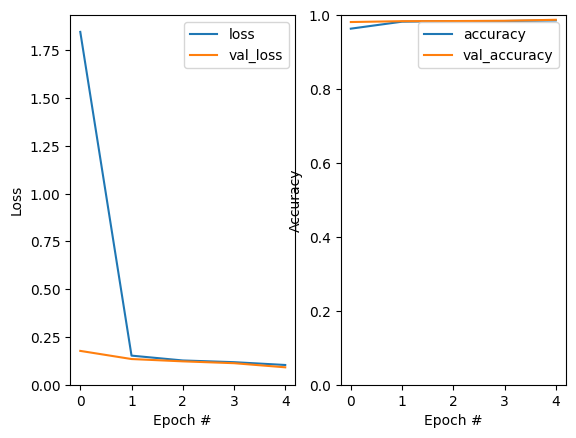

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
new_test_df = test_df[:750]
new_test_df

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...
745,"Students, parents and staff at a Melbourne hig...",A bubbler at a Melbourne high school has been ...
746,Steve Bruce is adamant he can keep Hull City i...,Steve Bruce adamant that Hull will avoid releg...
747,A 69-year-old mentally impaired man from Conne...,"Richard Lapointe, a former dishwasher, confess..."
748,Cate McGregor was surprised when she was uncon...,Cate McGregor is a Group Captain in the Royal ...


In [ ]:
new_test_df["clean_article"] = new_test_df['article'].apply(clean_text)
new_test_df["clean_highlights"] = new_test_df['highlights'].apply(clean_text)

<ipython-input-38-ea71970526cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df["clean_article"] = new_test_df['article'].apply(clean_text)
<ipython-input-38-ea71970526cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df["clean_highlights"] = new_test_df['highlights'].apply(clean_text)


In [ ]:
new_test_df

,article,highlights,clean_article,clean_highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,noticed plane seats appear getting smaller sma...,experts question packed planes putting passe...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,drunk teenage boy rescued security jumping lio...,drunk teenage boy climbed lion enclosure zoo w...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,dougie freedman verge agreeing new year deal r...,nottingham forest close extending dougie freed...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,liverpool target neto wanted psg clubs spain b...,fiorentina goalkeeper neto linked liverpool ar...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",bruce jenner break silence hour interview dian...,tell interview reality tv star 69 air friday a...
...,...,...,...,...
745,"Students, parents and staff at a Melbourne hig...",A bubbler at a Melbourne high school has been ...,students parents staff melbourne high school h...,bubbler melbourne high school dispensing recyc...
746,Steve Bruce is adamant he can keep Hull City i...,Steve Bruce adamant that Hull will avoid releg...,steve bruce adamant hull city barclays premier...,steve bruce adamant hull avoid relegation prem...
747,A 69-year-old mentally impaired man from Conne...,"Richard Lapointe, a former dishwasher, confess...",69 year old mentally impaired man connecticut ...,richard lapointe dishwasher confessed raping s...
748,Cate McGregor was surprised when she was uncon...,Cate McGregor is a Group Captain in the Royal ...,cate mcgregor surprised unconditionally backed...,cate mcgregor group captain royal australian a...


In [ ]:
X_test= new_test_df['clean_article'].values
y_test = new_test_df['clean_highlights'].values

In [ ]:
atricle_tokenizer = Tokenizer(num_words=2000, oov_token="<unk>")
atricle_tokenizer.fit_on_texts(X_test)
input_sequences = atricle_tokenizer.texts_to_sequences(X_test)
# Pad the sequences
max_vocab_size_en = 2000
X_padded_test = pad_sequences(input_sequences, maxlen=max_vocab_size_en)
print(X_padded_test[0].shape)

(2000,)


In [ ]:
highlights_tokenizer = Tokenizer(num_words=2000, oov_token="<unk>")
highlights_tokenizer.fit_on_texts(y_test)
output_sequences = highlights_tokenizer.texts_to_sequences(y_test)
# Pad the sequences
max_vocab_size = 2000
y_padded_test = pad_sequences(output_sequences, maxlen=max_summary_len)
print(y_padded_test[0].shape)

(1154,)


In [ ]:
# Evaluate on test data if available
test_loss = model.evaluate([X_padded_test, y_padded_test], y_padded_test, batch_size=16)

print(f"Test Loss: {test_loss}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9853 - loss: 0.1079
Test Loss: [0.1070103868842125, 0.9854062795639038]


Model 2:

In [ ]:
UNITS_3 = 128

encoder_inputs_3 = Input(shape=(2000,))
x_3 = Embedding(encoder_input_size, UNITS_3)(encoder_inputs_3)
encoder_outputs_3 = Bidirectional(LSTM(UNITS_3 // 2, return_sequences=True, dropout=0.2))(x_3)
encoder_outputs_3 = LSTM(UNITS_3, return_sequences=True, dropout=0.2)(encoder_outputs_3)  # Add another LSTM layer
encoder_outputs_3 = Dense(UNITS_3)(encoder_outputs_3)

decoder_inputs_3 = Input(shape=(max_summary_len,))
decoder_embeddings_3 = Embedding(decoder_input_size, UNITS_3)(decoder_inputs_3)
x_3 = LSTM(UNITS_3, return_sequences=True, dropout=0.2)(decoder_embeddings_3)


attention_3 = MultiHeadAttention(num_heads=1, key_dim=UNITS_3, dropout=0.2)
attention_output_3, attention_scores_3 = attention_3(query=x_3, value=encoder_outputs_3, return_attention_scores=True)

add_3 = Add()
normalization_3 = LayerNormalization()

attention_seq_3 = add_3([x_3, attention_output_3])
attention_seq_3 = normalization_3(attention_seq_3)

decoder_outputs_3 = Dense(decoder_input_size, activation='softmax')(attention_seq_3)

model_3 = Model(inputs=[encoder_inputs_3, decoder_inputs_3], outputs=decoder_outputs_3)
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit([padded_train_sequences_en, padded_train_sequences_de],
                        padded_train_sequences_de,
                        batch_size=16,
                        epochs=5,
                        validation_data=([padded_val_sequences_en, padded_val_sequences_de], padded_val_sequences_de))


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 543ms/step - accuracy: 0.9220 - loss: 4.3560 - val_accuracy: 0.9818 - val_loss: 0.1744
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 603ms/step - accuracy: 0.9820 - loss: 0.1626 - val_accuracy: 0.9836 - val_loss: 0.1347
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 510ms/step - accuracy: 0.9837 - loss: 0.1308 - val_accuracy: 0.9840 - val_loss: 0.1229
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 544ms/step - accuracy: 0.9840 - loss: 0.1206 - val_accuracy: 0.9846 - val_loss: 0.1150
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 548ms/step - accuracy: 0.9850 - loss: 0.1097 - val_accuracy: 0.9866 - val_loss: 0.0967


Model 3:

In [ ]:
UNITS_4 = 128
MAX_LEN_4_ARTICLE = 1500
MAX_LEN_4_SUMMARY = 50

encoder_inputs_4 = Input(shape=(MAX_LEN_4_ARTICLE,))
x_4 = Embedding(encoder_input_size, UNITS_4)(encoder_inputs_4)
encoder_outputs_4 = Bidirectional(LSTM(UNITS_4 // 2, return_sequences=True, dropout=0.2))(x_4)
encoder_outputs_4 = Dense(UNITS_4)(encoder_outputs_4)

decoder_inputs_4 = Input(shape=(MAX_LEN_4_SUMMARY,))
decoder_embeddings_4 = Embedding(decoder_input_size, UNITS_4)(decoder_inputs_4)
x_4 = LSTM(UNITS_4, return_sequences=True, dropout=0.2)(decoder_embeddings_4)

attention_4 = MultiHeadAttention(num_heads=1, key_dim=UNITS_4, dropout=0.2)
attention_output_4, attention_scores_4 = attention_4(query=x_4, value=encoder_outputs_4, return_attention_scores=True)

add_4 = Add()
normalization_4 = LayerNormalization()

attention_seq_4 = add_4([x_4, attention_output_4])
attention_seq_4 = normalization_4(attention_seq_4)

decoder_outputs_4 = Dense(decoder_input_size, activation='softmax')(attention_seq_4)

model_4 = Model(inputs=[encoder_inputs_4, decoder_inputs_4], outputs=decoder_outputs_4)
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Pad sequences with the new max lengths
X_padded_4 = pad_sequences(input_sequences, maxlen=MAX_LEN_4_ARTICLE)
y_padded_4 = pad_sequences(output_sequences, maxlen=MAX_LEN_4_SUMMARY)

padded_train_sequences_en_4, padded_val_sequences_en_4, padded_train_sequences_de_4, padded_val_sequences_de_4 = train_test_split(
    X_padded_4,
    y_padded_4,
    test_size=0.2,
    random_state=42
)


history_4 = model_4.fit([padded_train_sequences_en_4, padded_train_sequences_de_4],
                        padded_train_sequences_de_4,
                        batch_size=16,
                        epochs=5,
                        validation_data=([padded_val_sequences_en_4, padded_val_sequences_de_4], padded_val_sequences_de_4))


Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.4742 - loss: 7.8861 - val_accuracy: 0.5677 - val_loss: 4.2555
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.5796 - loss: 3.7630 - val_accuracy: 0.5836 - val_loss: 3.3906
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.6168 - loss: 2.9836 - val_accuracy: 0.5836 - val_loss: 3.1827
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6046 - loss: 2.8910 - val_accuracy: 0.5836 - val_loss: 3.0897
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.6014 - loss: 2.7934 - val_accuracy: 0.5907 - val_loss: 2.9266


In [ ]:
test_loss_1 = model.evaluate([X_padded_test, y_padded_test], y_padded_test, batch_size=16)
test_loss_2 = model_3.evaluate([X_padded_test, y_padded_test], y_padded_test, batch_size=16)
test_loss_3 = model_4.evaluate([X_padded_test, y_padded_test], y_padded_test, batch_size=16)

print(f"System 1 Test Loss: {test_loss_1}")
print(f"System 2 Test Loss: {test_loss_2}")
print(f"System 3 Test Loss: {test_loss_3}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.9853 - loss: 0.1079
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.9847 - loss: 0.1113
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.9825 - loss: 0.1415
System 1 Test Loss: [0.1070232167840004, 0.9854188561439514]
System 2 Test Loss: [0.11049050092697144, 0.9847475290298462]
System 3 Test Loss: [0.14112499356269836, 0.9824713468551636]
